In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
from sklearn.ensemble import VotingClassifier, VotingRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, r2_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# 앙상블(Ensemble) 

- Ensemble : 조화라는 사전적인 의미를 지님
- Ensemble Learning
    - 여러 개의 기본 모델을 활용하여 하나의 새로운 모델을 만들어내는 개념 
    - 기본모델(Base Model)을 weak learner, classifier, base 

###  보팅(Voting) 
    - 여러개의 분류기가 투표를 통헤 최종 예측 결과를 결정하는 방식 
    - 하드보팅 : 다수의 classifier 간 다수결의 최종 class 결정 
    - 소프트보팅 : 다수의 classfier 들의 class 확률을 평균하여 결정 
    - Voting Classifier¶ 활용 

    모델=[(키1,예측기1),(키2,예측기2)] , voting='soft/hard' )


# Voting Classification

## Voting

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb5UNZc%2FbtrhVZEJkJA%2F1bqKVdovvqY2NY050MWMSK%2Fimg.jpg'>

**위스콘신 유방암 데이터 로드**

- cancer.data
- cancer.feature_names
- cancer.target 

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
# print(cancer.DESCR)

In [7]:
# 전체 갯수 확인
data_df.shape

(569, 30)

In [8]:
# cancer.target

In [9]:
# cancer.DESCR

### VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교

In [10]:
# from sklearn.ensemble import VotingClassifier

# 1) 모델 2개 생성 
model_lr = LogisticRegression() 
model_knn = KNeighborsClassifier(n_neighbors=8)

# 2) voting 형식으로 새로운 모델 생성 
# 모델명 = VotingClassifier( estimators = [('측정기변수', 측정기생성자), ...])
model_vo = VotingClassifier( estimators=[('LR',model_lr),('KNN',model_knn)] , voting='soft' )

# 3) 학습, 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# 4) 학습 LogisticRegression() + KNeighborsClassifier(n_neighbors=8)
model_vo.fit(X_train , y_train)

# 5) 평가 
model_vo.score(X_train , y_train)
model_vo.score(X_test , y_test)


0.9473684210526315

In [11]:
# 각 모델을 리스트로 생성해서 
# 모델 학습및 평가 데이타 확인 
classifiers = [model_lr, model_knn, model_vo]
for clf in classifiers:
    clf.fit(X_train , y_train)
    print(clf, clf.score(X_test , y_test))
    print(classification_report(y_test, clf.predict(X_test)))
    print()

LogisticRegression() 0.9385964912280702
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        37
           1       0.94      0.97      0.96        77

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114


KNeighborsClassifier(n_neighbors=8) 0.9385964912280702
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.96      0.95      0.95        77

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft') 0.9473684210526315
              precision    recall  f1-score   support

        

### voting='hard' 방식

In [12]:
# from sklearn.ensemble import VotingClassifier

model_lr = LogisticRegression() 
model_knn = KNeighborsClassifier(n_neighbors=8)

# hard 가 기본값 
model_vo2 = VotingClassifier( estimators=[('LR',model_lr),('KNN',model_knn)] , voting='hard' )
# model_vo2 = VotingClassifier( estimators=[('LR',model_lr),('KNN',model_knn)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

model_vo2.fit(X_train , y_train)
model_vo2.score(X_train , y_train)
model_vo2.score(X_test , y_test)

0.9385964912280702

In [13]:
# 각 모델을 리스트로 생성해서 
# 모델 학습및 평가 데이타 확인 
classifiers = [model_lr, model_knn, model_vo2]
for clf in classifiers:
    clf.fit(X_train , y_train)
    print(clf, clf.score(X_test , y_test))
    print()

LogisticRegression() 0.9385964912280702

KNeighborsClassifier(n_neighbors=8) 0.9385964912280702

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))]) 0.9385964912280702



In [14]:
y_test[0]

1

In [15]:
X_test[0]

array([1.311e+01, 2.254e+01, 8.702e+01, 5.294e+02, 1.002e-01, 1.483e-01,
       8.705e-02, 5.102e-02, 1.850e-01, 7.310e-02, 1.931e-01, 9.223e-01,
       1.491e+00, 1.509e+01, 5.251e-03, 3.041e-02, 2.526e-02, 8.304e-03,
       2.514e-02, 4.198e-03, 1.455e+01, 2.916e+01, 9.948e+01, 6.393e+02,
       1.349e-01, 4.402e-01, 3.162e-01, 1.126e-01, 4.128e-01, 1.076e-01])

In [16]:
# predict_proba is not available when voting='hard'
# predict_proba() => soft 방식일때만 가능 
# voting='hard' 인 경우에는 에러 발생 
model_vo.predict_proba([X_test[0]])

array([[0.0118036, 0.9881964]])

In [17]:
# model_vo2.predict_proba([X_test[0]])

# Voting Regressor

In [18]:
from sklearn.ensemble import VotingRegressor

In [19]:
# 회기용 데이타 
from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)
 
boston_df['PRICE'] = boston.target

In [20]:
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split( X_data , y_target , \
                                                       test_size=0.3, random_state=156)

In [21]:
# from sklearn.ensemble import VotingRegressor

model_linear = LinearRegression()
model_lasso = Lasso(alpha=100)
model_ridge = Ridge(alpha=100)

# voting='soft' (X)
model_vo_r = VotingRegressor( estimators=[('LINEAR', model_linear),('LASSO', model_lasso), ('RIDGE', model_ridge)])

model_vo_r.fit(X_train , y_train)
model_vo_r.score(X_test , y_test))

0.6536324706721894 0.709581503855359


In [22]:
# 사용한 알고리즘
model_vo_r.estimators_

[LinearRegression(), Lasso(alpha=100), Ridge(alpha=100)]

In [27]:
# 사용한 알고리즘의 상세 파라미터 
model_vo_r.named_estimators_

{'LINEAR': LinearRegression(),
 'LASSO': Lasso(alpha=100),
 'RIDGE': Ridge(alpha=100)}

In [28]:
model_vo_r.score(X_test , y_test), r2_score(y_test, model_vo_r.predict(X_test))

(0.709581503855359, 0.709581503855359)

In [29]:
X_test.loc[15]

CRIM         0.62739
ZN           0.00000
INDUS        8.14000
CHAS         0.00000
NOX          0.53800
RM           5.83400
AGE         56.50000
DIS          4.49860
RAD          4.00000
TAX        307.00000
PTRATIO     21.00000
B          395.62000
LSTAT        8.47000
Name: 15, dtype: float64

In [30]:
# 샘플데이타에 대한 예측 가격 
model_vo_r.predict([X_test.loc[15]])

array([22.22239808])

In [31]:
# 퀴즈 1 : 회기문제 
# - 자전거 대여 수요 예측 
# 앙상블 voting 방식으로 여러 모델을 그룹화 시켜  모델을 새로 정의하고 테스트하여라 


In [32]:
bike_df = pd.read_csv('data/bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [33]:
# NULL 값은 없음 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [34]:
# 문자열을 datetime 타입으로 변경. 
# 시계열 형식으로 변경하여 년월일시간 등으로 후에 사용
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [35]:
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
print(bike_df.info())
bike_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [36]:
# 회원, 비회원 대여량은 삭제 
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [37]:
# 자전거 대여수 y 지정 
y_target = bike_df['count']

X_features = bike_df.drop(['count'],axis=1,inplace=False)

In [38]:
# 'year','month','hour','season','weather' feature들을 One Hot Encoding
X_features = pd.get_dummies(X_features, columns=['year','month','hour', 'holiday',
                                              'workingday','season','weather'])

In [39]:
X_features.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'day', 'year_2011',
       'year_2012', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')

In [40]:
# 학습데이타, 테스트데이타 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [41]:
# from sklearn.ensemble import VotingRegressor
# from sklearn.ensemble import RandomForestRegressor

# VotingRegressor 모델 테스트 
model_linear = LinearRegression()
model_lasso = Lasso(alpha=0.001)
model_ridge = Ridge(alpha=0.001)

model_vo_r = VotingRegressor( estimators=[('LINEAR', model_linear),('LASSO', model_lasso), ('RIDGE', model_ridge)])

model_vo_r.fit(X_train , y_train)
model_vo_r.score(X_test , y_test), model_vo_r.score(X_train , y_train)

(0.6824855884037058, 0.6977477637796877)

In [42]:
r2_score(y_test, model_vo_r.predict(X_test))

0.6824855884037058

In [44]:
# 각 모델 테스트 
regressor = [model_linear, model_lasso, model_ridge]
for r in regressor:
    r.fit(X_train , y_train)
    print(r, r.score(X_test , y_test), r.score(X_train , y_train))
    print()

LinearRegression() 0.6824846398909732 0.6977478026269741

Lasso(alpha=0.001) 0.6824875811389105 0.6977475255657988

Ridge(alpha=0.001) 0.6824845215232669 0.6977477889294663



In [45]:
# 퀴즈 2 : 분류문제 
# 심부전증 의료 데이타 
# 앙상블 voting 방식으로 여러 모델을 그룹화 시켜  모델을 새로 정의하고 테스트하여라 

In [46]:
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [48]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

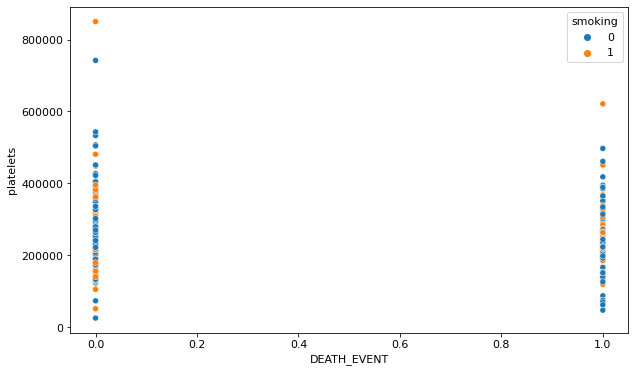

In [52]:
# 혈소판(platelets)과 사망/생존 과의 관계 
# x = DEATH_EVENT 0 또는 1의 값 
sns.scatterplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

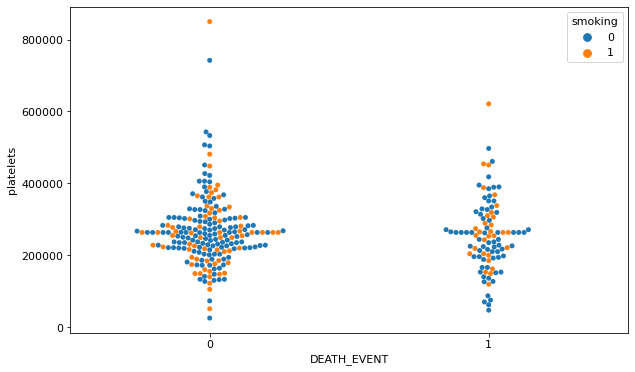

In [53]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

In [54]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [55]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분
# 수치형 
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
# 범주형 
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [56]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

# 수치형(스케일링) + 범주형 
X = pd.concat([X_scaled, X_cat], axis=1)

In [57]:
X.sample(3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
216,0.771889,0.640223,1.008578,0.96929,-0.478205,0.993074,0,0,1,0,0
255,-0.743913,-0.403483,-0.684180,0.72349,-0.381379,1.220084,1,1,1,1,1
115,-0.238646,-0.187722,0.162199,-1.01759,-0.381379,0.539054,1,0,0,0,0


In [58]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train.shape, X_test.shape

((209, 11), (90, 11))

In [59]:
model_lr = LogisticRegression() 
model_knn = KNeighborsClassifier(n_neighbors=7)
model_dt = DecisionTreeClassifier(random_state=100)

# hard 가 기본값 
# model_vo2 = VotingClassifier( estimators=[('LR',model_lr),('KNN',model_knn),('DT',model_dt)] , voting='hard' )
model_vo2 = VotingClassifier( estimators=[('LR',model_lr),('KNN',model_knn),('DT',model_dt)] , voting='soft' )

model_vo2.fit(X_train , y_train)
model_vo2.score(X_test , y_test)

0.7222222222222222

In [60]:
print(classification_report(y_test, model_vo2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        61
           1       0.60      0.41      0.49        29

    accuracy                           0.72        90
   macro avg       0.68      0.64      0.65        90
weighted avg       0.71      0.72      0.71        90



In [61]:
# 각 모델을 리스트로 생성해서 
# 모델 학습및 평가 데이타 확인 
classifiers = [model_lr, model_knn, model_dt]
for clf in classifiers:
    clf.fit(X_train , y_train)
    print(clf, clf.score(X_test , y_test))
    print()
    print(classification_report(y_test, model_vo2.predict(X_test)))
    print()

LogisticRegression() 0.6888888888888889

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        61
           1       0.60      0.41      0.49        29

    accuracy                           0.72        90
   macro avg       0.68      0.64      0.65        90
weighted avg       0.71      0.72      0.71        90


KNeighborsClassifier(n_neighbors=7) 0.7111111111111111

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        61
           1       0.60      0.41      0.49        29

    accuracy                           0.72        90
   macro avg       0.68      0.64      0.65        90
weighted avg       0.71      0.72      0.71        90


DecisionTreeClassifier(random_state=100) 0.7

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        61
           1       0.60      0.41      0.49        29

    accuracy                         

In [62]:
model_dt.feature_importances_

array([0.09689222, 0.1419269 , 0.27989258, 0.12837568, 0.26319971,
       0.07451573, 0.        , 0.        , 0.01519718, 0.        ,
       0.        ])

<AxesSubplot:>

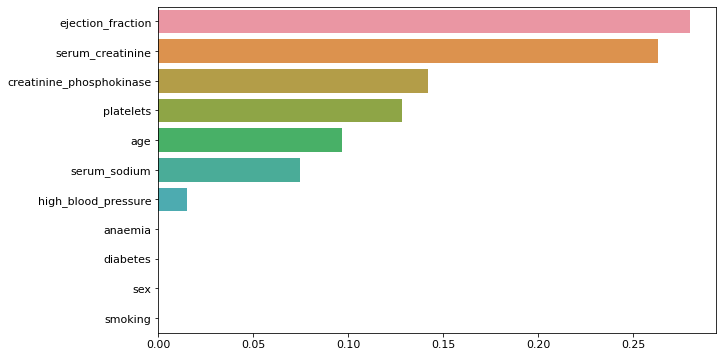

In [63]:
feature_series = pd.Series(data=model_dt.feature_importances_, index=X_train.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

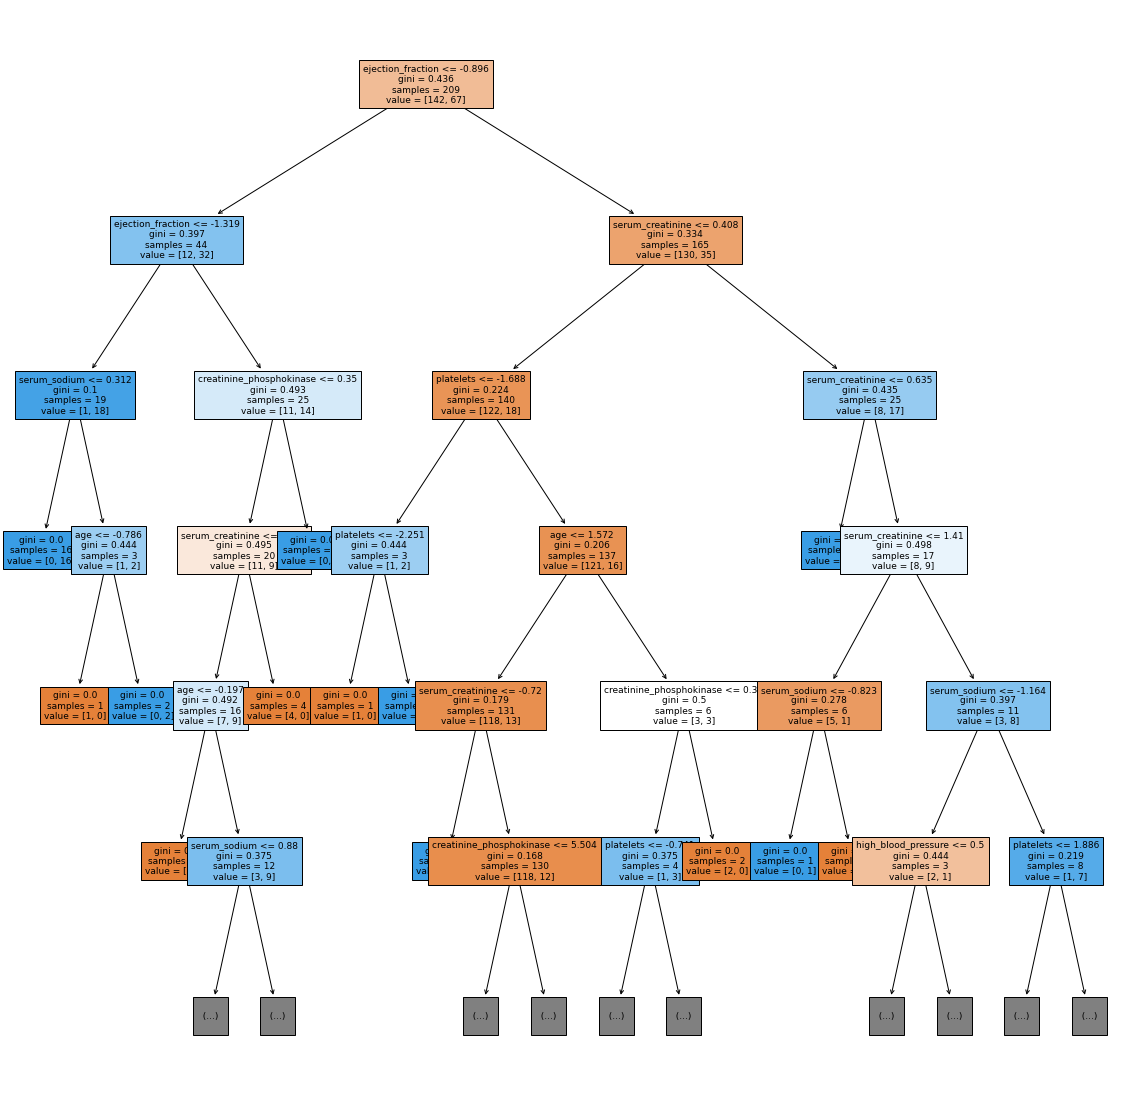

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model_dt, max_depth=5, filled=True, feature_names=X_train.columns, fontsize=9)
plt.show()